---
## Forecasting <br> <font size=3.4> Dataset:Airlines+Data.xlsx<br><font size=2>Forecast the Airlines Passengers data set.
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [4]:
df1= df.set_index('Month')
df1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [5]:
df1.dtypes

Passengers    int64
dtype: object

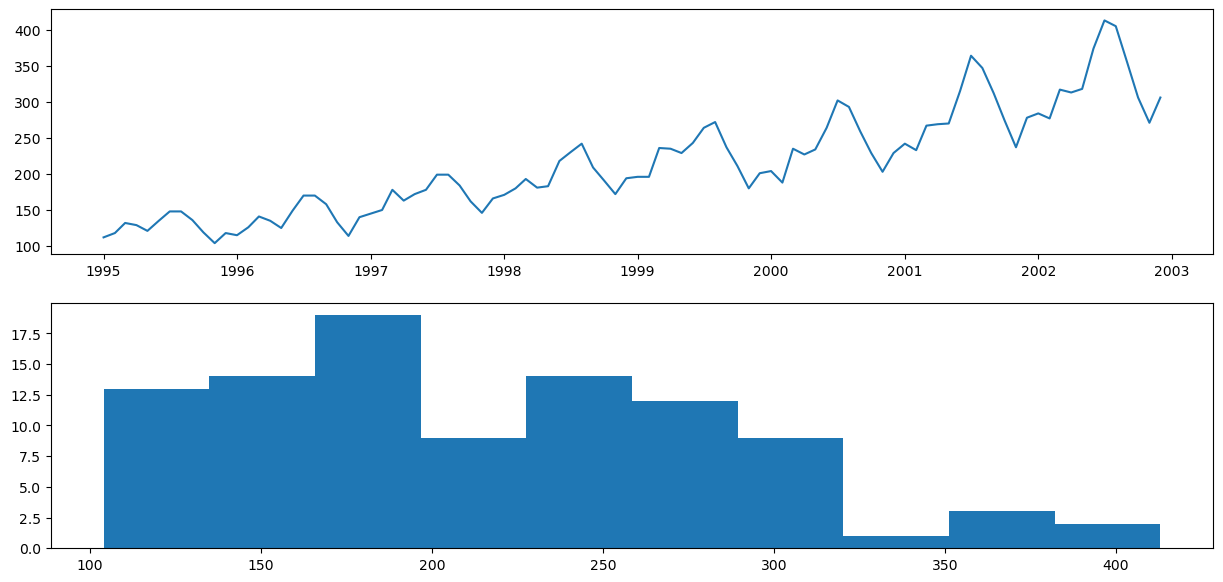

In [6]:
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(df1)
# histogram
plt.subplot(212)
plt.hist(df1)
plt.show()

### Square Root Transform

In [7]:
from numpy import sqrt
from pandas import DataFrame

In [8]:
dataframe = DataFrame(df1.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

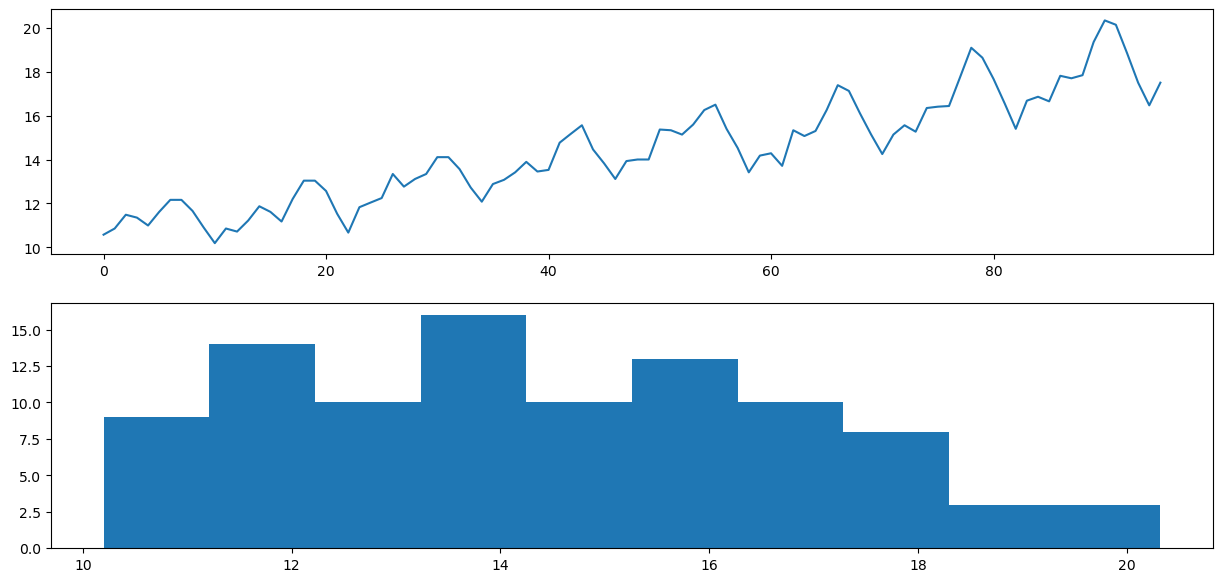

In [9]:
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

### Log Transform

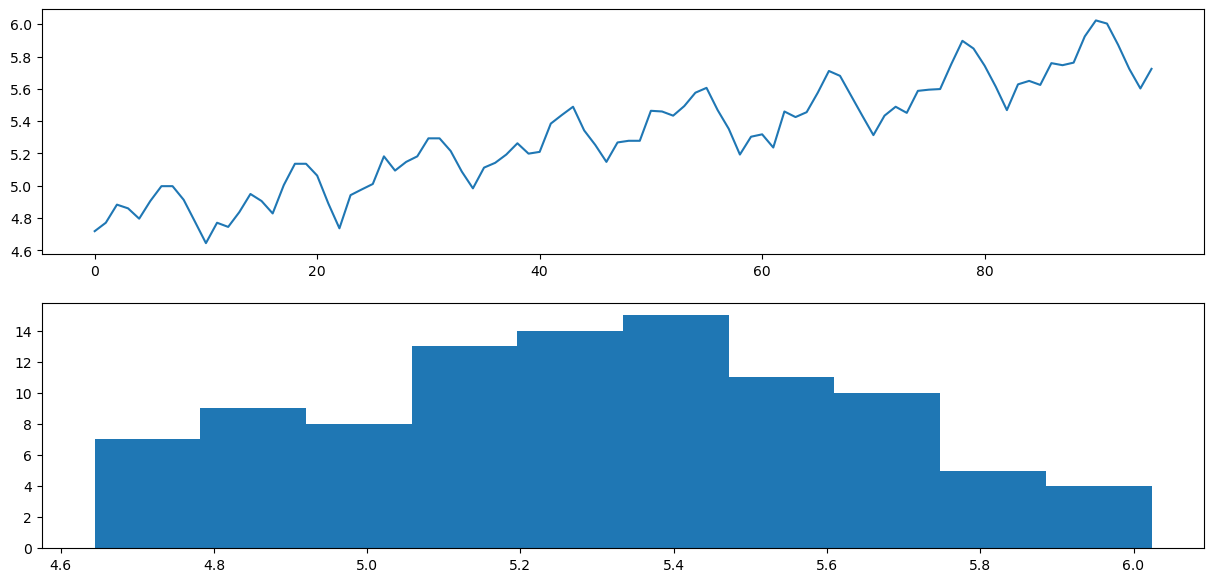

In [10]:
from numpy import log
dataframe = DataFrame(df1.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

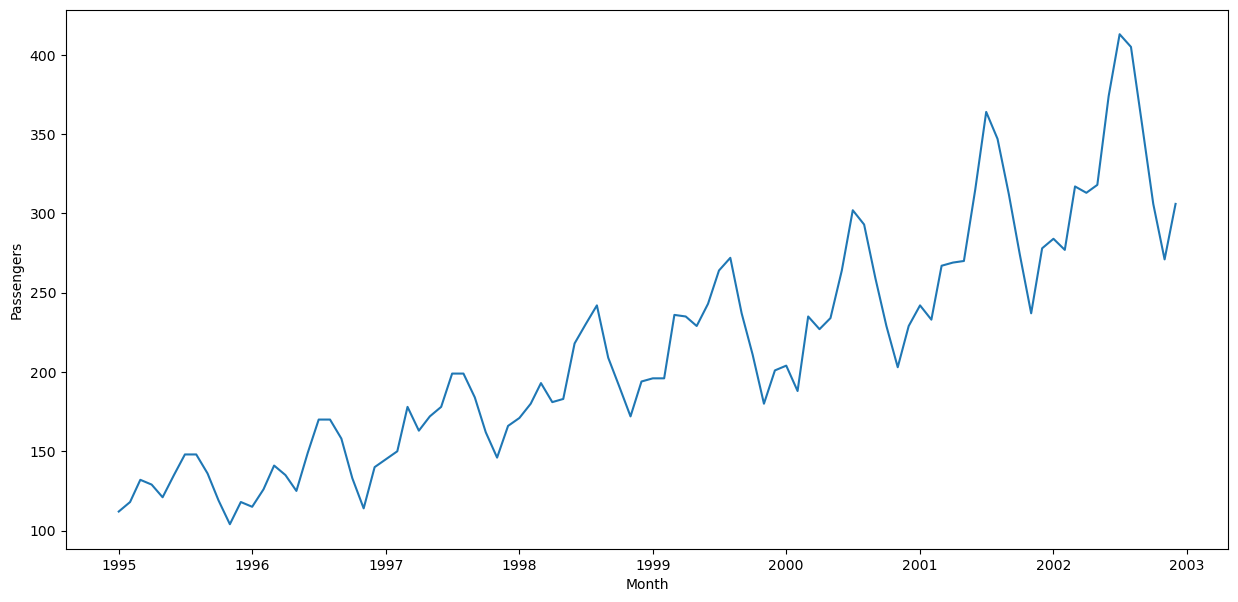

In [11]:
plt.figure(figsize=(15,7))
sns.lineplot(x="Month",y="Passengers",data=df1)

In [12]:
df1["t"] = np.arange(1,97)

df1["t_sq"] = df1["t"]*df1["t"]

df1["log_Passengers"] = np.log(df1["Passengers"])
df1

,Passengers,t,t_sq,log_Passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


In [13]:
Train = df1.head(77)
Test = df1.tail(19)

In [14]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.1485443195088

In [15]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

47.88965425184011

In [16]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.926328528188215

In [17]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,47.889654
0,rmse_linear,58.148544
2,rmse_Quad,58.926329


In [18]:
df2 = df1.iloc[:,0:1]
df2

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [19]:
# separate out a validation dataset
split_point = len(df2) - 10
dataset, validation = df2[0:split_point], df2[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


### Persistence/ Base model

In [20]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [21]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

# ARIMA Hyperparameters

In [22]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

### Grid search for p,d,q values

In [23]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [24]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


### Build Model based on the optimized values¶

In [28]:
# save finalized model to file
from pandas import read_csv
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import numpy

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.predict(1, 96)

array([118.0100546 , 134.691995  , 125.69763122, 118.22182912,
       135.39019282, 149.94070344, 144.44019823, 127.54838684,
       115.06125704, 105.44409944, 127.16969123, 114.33452843,
       133.27389625, 137.16762623, 135.49287769, 118.08573468,
       155.19850163, 168.14088709, 166.30896793, 142.62201862,
       127.3719769 , 114.04575611, 152.72895764, 142.80851253,
       154.35689203, 172.84713503, 157.28234852, 171.27458548,
       168.81494601, 204.99087688, 184.5007756 , 178.53214665,
       148.72686589, 151.52216226, 172.11219006, 173.77775096,
       180.42604943, 189.02769615, 175.96727952, 182.23521571,
       220.20907924, 225.56975092, 235.38179886, 185.52580911,
       192.33854158, 164.46243711, 213.44134087, 186.5540642 ,
       205.07210618, 231.89180641, 233.39589198, 219.54273044,
       237.14561989, 263.4932373 , 265.71159196, 216.89388804,
       205.55168003, 177.24359911, 222.95382339, 200.44455832,
       195.70814137, 239.9703979 , 223.8873315 , 237.91

### Combine train and test data and build final model

In [36]:
# fit model
df = pd.read_excel('Airlines+Data.xlsx')
df1= df.set_index('Month')

# prepare data
X = df1.values
X = X.astype('float32')

In [37]:
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()

In [38]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.predict(1,96)

array([112.01380514, 119.39193597, 134.72166788, 125.15748892,
       117.41929809, 136.64884339, 150.19840007, 143.96916709,
       126.21782349, 114.83814271, 104.71084217, 127.88613997,
       113.25323164, 134.20663908, 136.88713592, 136.06986322,
       116.44050974, 157.69176893, 168.64772493, 166.96320773,
       140.64312562, 127.88194639, 112.82654935, 154.98373883,
       141.54845558, 155.67642733, 172.98594011, 158.06281961,
       171.12695252, 169.5644508 , 207.12018439, 183.85028695,
       178.55625079, 147.23884678, 152.45962064, 172.39371803,
       174.36123515, 180.20021187, 190.08047688, 175.44725265,
       182.80634974, 222.12481753, 226.79854791, 235.91719759,
       183.43502994, 193.46281951, 162.80831712, 216.43338616,
       184.06761634, 207.26060617, 231.97452541, 235.69806223,
       217.40817807, 239.54091552, 264.78077026, 267.24222526,
       213.49749079, 206.22330301, 175.39050169, 225.84961284,
       197.60223019, 196.55376905, 240.6933235 , 225.00

In [39]:
forecast

332.19710452794027